In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

# Preliminary Plots:

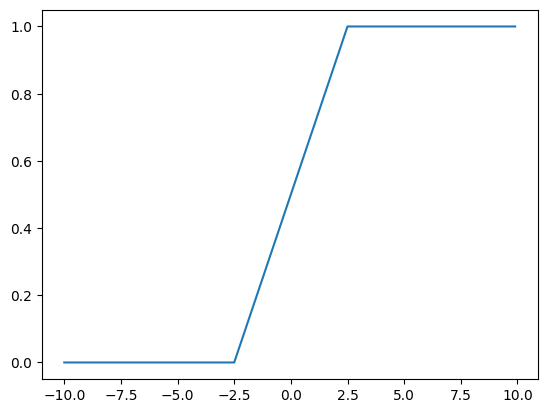

In [2]:
# Hard Sigmoid:
x = np.arange(-10,10,0.1)
a = tf.constant(x, dtype = tf.float32)
y = tf.keras.activations.hard_sigmoid(a)
plt.plot(a,y)

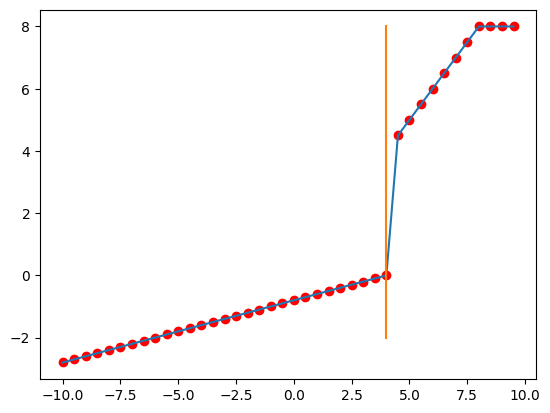

In [3]:
# Relu:
x = np.arange(-10,10,0.5)
y = tf.keras.activations.relu(x, threshold=4, alpha=0.2, max_value = 8)
plt.plot(x,y)
plt.scatter(x,y, color="red")
plt.plot([4,4], [-2,8])

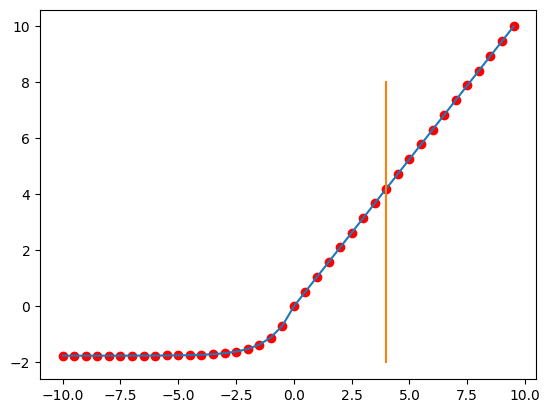

In [4]:
# Selu:
x = np.arange(-10,10,0.5)
y = tf.keras.activations.selu(x)
plt.plot(x,y)
plt.scatter(x,y, color="red")
plt.plot([4,4], [-2,8])

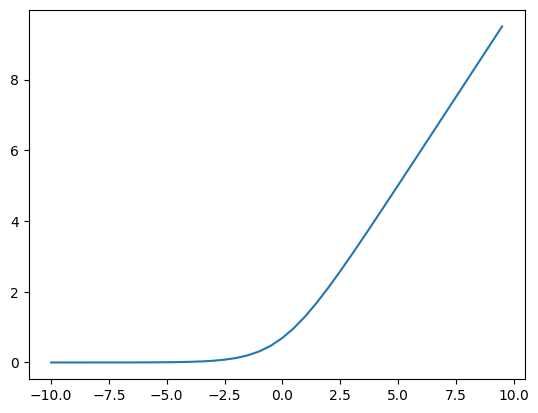

In [5]:
# Softplus:
x = np.arange(-10,10,0.5)
y = tf.keras.activations.softplus(x)
plt.plot(x,y)

# Derivatives:

In [6]:
# Derivatives of Activation Functions, returns u (dep. term) and v (indep. term) of the derivative (except softmax):


# Elu:
def af_elu(af_in, af_out, alpha=1):
  if af_in<0:
    u = af_out + alpha
    v = af_out - u*af_in
  else:
    u, v = 1, 0
  return u, v


# Exponential:
def af_exp(af_in, af_out):
  u = af_out
  v = af_out - u*af_in
  return u, v


# Gelu:
def af_gelu(af_in, af_out):
  u = af_out/af_in + (af_in/(np.sqrt(2*np.pi))) * np.exp( - (af_in**2)/2 )
  v = af_out - u*af_in
  return u, v


# Hard Sigmoid:
def af_hardsigmoid(af_in, af_out):
  if af_in<-2.5: 
    u, v = 0, 0
  elif 2.5<af_in: 
    u, v = 0, 1
  else: 
    u, v = 0.2, 0.5
  return u, v


# Linear:
def af_linear(af_in, af_out):
  u, v = 1, 0
  return u, v


# Relu:
def af_relu(af_in, af_out, alpha=0, max_value=np.inf, threshold=0):
  if af_out >= max_value:
    return 0, max_value
  
  if threshold < af_in:
    u, v = 1, 0
  else:
    u, v= alpha, -alpha*threshold
  
  return u, v


# Selu:
def af_selu(af_in, af_out):

  # alpha and scale are pre-defined constants:
  alpha=1.67326324
  scale=1.05070098

  if af_in<0:
    u = scale*alpha*np.exp(af_in)
    v = af_out - u*af_in
  else:
    u, v = scale, 0
  return u, v


# Sigmoid:
def af_sigmoid(af_in, af_out):
  u = af_out*(1-af_out)
  v = af_out - u*af_in
  return u, v


# Softmax (not normal, uses info of all the activation functions in the layer):
def afs_softmax(in_slopes_mat, afs_out_vec, x_in_vec):

  # afs_out_vec must be a column vector, x_in_vec must be a row vector:
  afs_out_vec = afs_out_vec.reshape((-1, 1))
  x_in_vec = x_in_vec.reshape((1, -1))

  # Get the matrix of slopes for the outputs:
  sum_of_prod_1 = np.sum(np.multiply(in_slopes_mat, afs_out_vec), axis =0)
  diff_1 = np.subtract(in_slopes_mat, sum_of_prod_1)
  out_slopes_mat = np.multiply(diff_1, afs_out_vec)

  # Get the vector of independent terms for the outputs:
  sum_of_prod_2 = np.sum(np.multiply(out_slopes_mat, x_in_vec), axis=1).reshape((-1, 1))
  out_indeps_vec = np.subtract(afs_out_vec, sum_of_prod_2)

  return out_slopes_mat, out_indeps_vec
  

# Softplus:
def af_softplus(af_in, af_out):
  u = 1/(1+np.exp(-af_in))
  v = af_out - u*af_in
  return u, v


# Softsign:
def af_softsign(af_in, af_out):
  u = (1+np.abs(af_in))**(-2)
  v = af_out - u*af_in
  return u, v


# Swish:
def af_swish(af_in, af_out):
  u = (af_out/af_in) * (1+af_in-af_out)
  v = af_out - u*af_in
  return u, v


# Tanh:
def af_tanh(af_in, af_out):
  u = (np.cosh(af_in))**(-2)
  v = af_out - u*af_in
  return u, v

# Checking:

In [7]:
def line_plotter(x_i, u_i, v_i):
  r = np.arange(x_i-2,x_i+2,0.1)
  s = r*u_i + v_i
  plt.plot(r,s, c='red')
  return

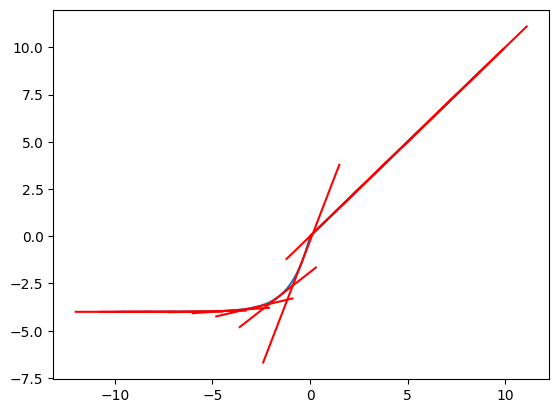

In [8]:
# Elu:
using_alpha = 4

x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,1.2)
y1 = tf.keras.activations.elu(x1, alpha=using_alpha)
y2 = tf.keras.activations.elu(x2, alpha=using_alpha)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_elu(x_i, y_i, alpha=using_alpha)
    line_plotter(x_i, u_i, v_i)

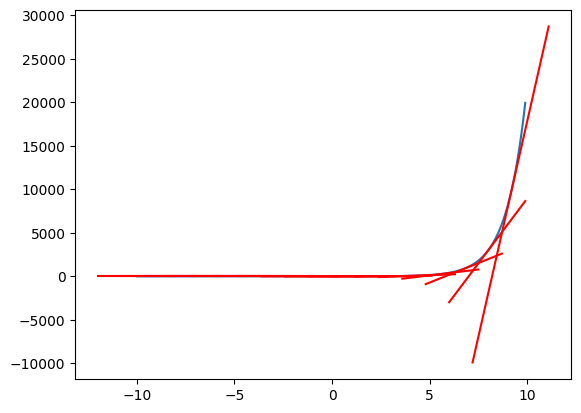

In [9]:
# Exponential:
x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,1.2)
y1 = tf.keras.activations.exponential(x1)
y2 = tf.keras.activations.exponential(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_exp(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

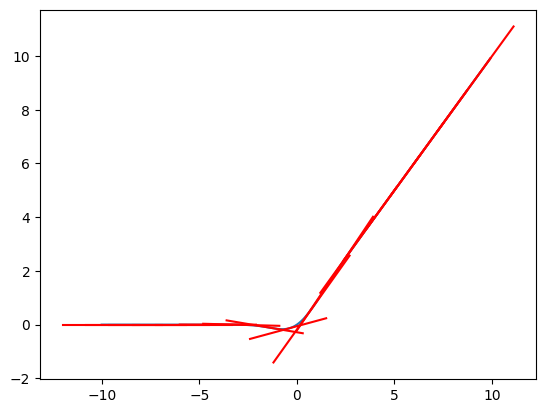

In [10]:
# Gelu:
using_approximate = False # You can try both True or False

x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,1.2)
y1 = tf.keras.activations.gelu(x1, approximate=using_approximate)
y2 = tf.keras.activations.gelu(x2, approximate=using_approximate)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_gelu(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

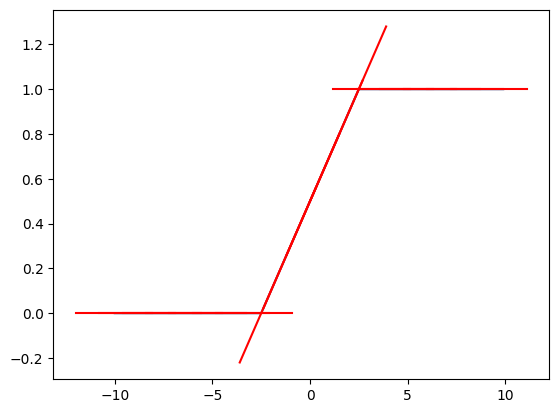

In [11]:
# Hard Sigmoid:
x1 = tf.constant(np.arange(-10,10,0.1), dtype = tf.float32)
x2 = tf.constant(np.arange(-10,10,1.2), dtype = tf.float32)

y1 = tf.keras.activations.hard_sigmoid(x1)
y2 = tf.keras.activations.hard_sigmoid(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_hardsigmoid(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

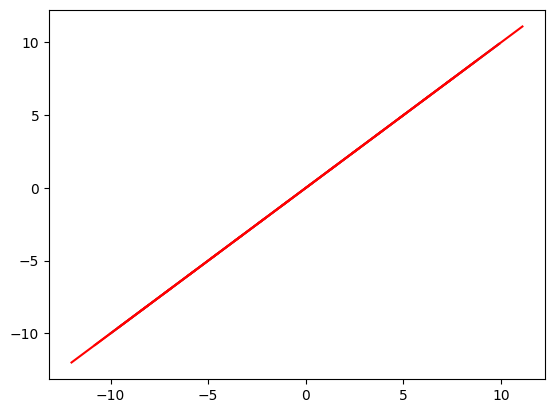

In [12]:
# Linear:
x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,1.2)
y1 = tf.keras.activations.linear(x1)
y2 = tf.keras.activations.linear(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_linear(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

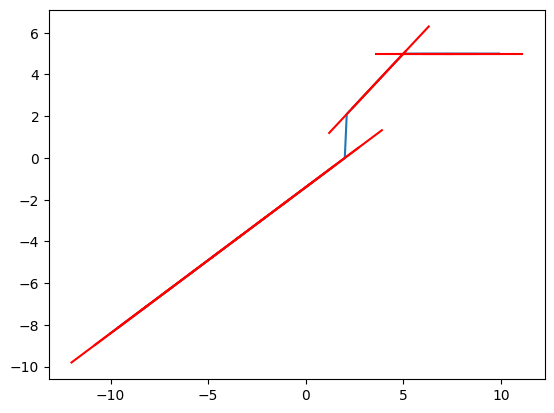

In [13]:
# Relu:
using_alpha = 0.7
using_max_val = 5
using_threshold = 2

x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,1.2)
y1 = tf.keras.activations.relu(x1, alpha=using_alpha, max_value=using_max_val, threshold=using_threshold)
y2 = tf.keras.activations.relu(x2, alpha=using_alpha, max_value=using_max_val, threshold=using_threshold)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_relu(x_i, y_i,  max_value=using_max_val, alpha=using_alpha, threshold=using_threshold)
    line_plotter(x_i, u_i, v_i)


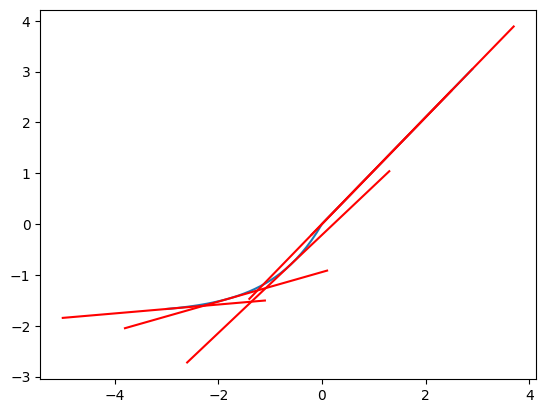

In [14]:
# Selu:
x1 = np.arange(-3,3,0.1)
x2 = np.arange(-3,3,1.2)
y1 = tf.keras.activations.selu(x1)
y2 = tf.keras.activations.selu(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_selu(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

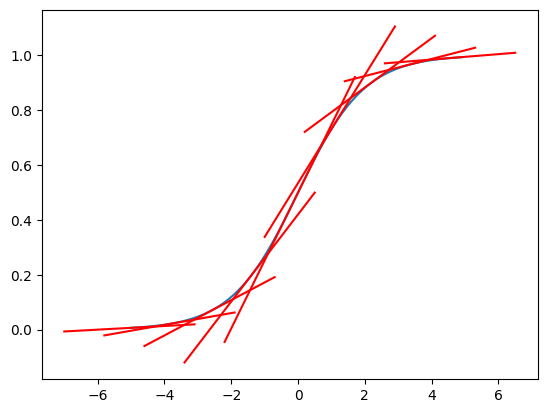

In [15]:
# Sigmoid:
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,1.2)
y1 = tf.keras.activations.sigmoid(x1)
y2 = tf.keras.activations.sigmoid(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_sigmoid(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

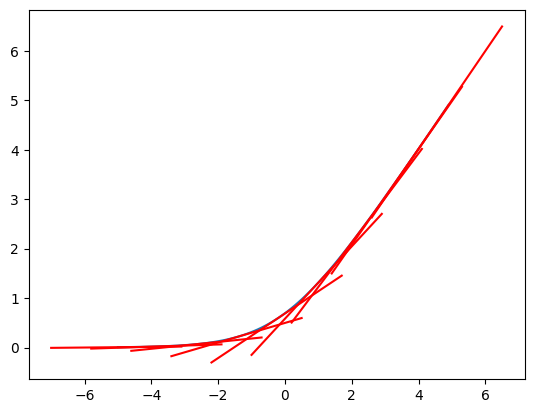

In [16]:
# Softplus:
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,1.2)
y1 = tf.keras.activations.softplus(x1)
y2 = tf.keras.activations.softplus(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_softplus(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

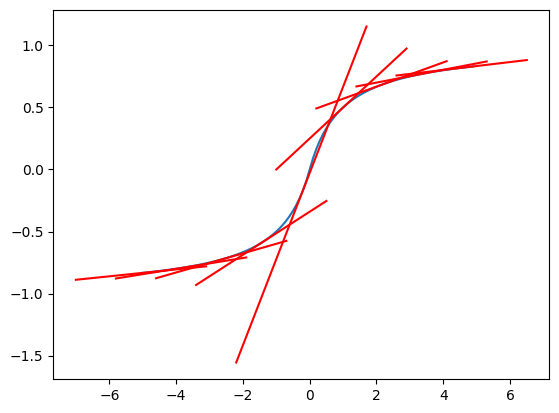

In [17]:
# Softsign:
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,1.2)
y1 = tf.keras.activations.softsign(x1)
y2 = tf.keras.activations.softsign(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_softsign(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

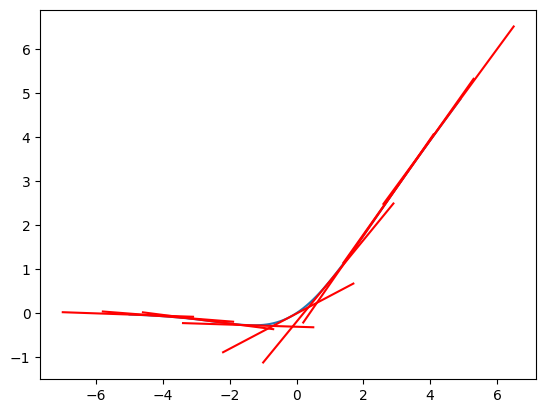

In [18]:
# Swish:
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,1.2)
y1 = tf.keras.activations.swish(x1)
y2 = tf.keras.activations.swish(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_swish(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

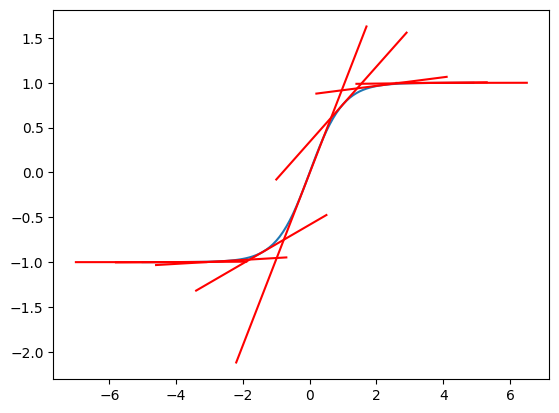

In [19]:
# Tanh:
x1 = np.arange(-5,5,0.1)
x2 = np.arange(-5,5,1.2)
y1 = tf.keras.activations.tanh(x1)
y2 = tf.keras.activations.tanh(x2)

plt.figure()
plt.plot(x1,y1)

if True:
  for x_i, y_i in zip(x2,y2):
    u_i, v_i = af_tanh(x_i, y_i)
    line_plotter(x_i, u_i, v_i)

# Test 1 of the Softmax:

In [20]:
# Test 1:
num_of_instances = 100

a = np.linspace(-10.0, 10.0, num=num_of_instances).reshape((num_of_instances,1))
c = 0.5*np.ones((num_of_instances,2))

X = np.append(a, c, axis=1)
#X

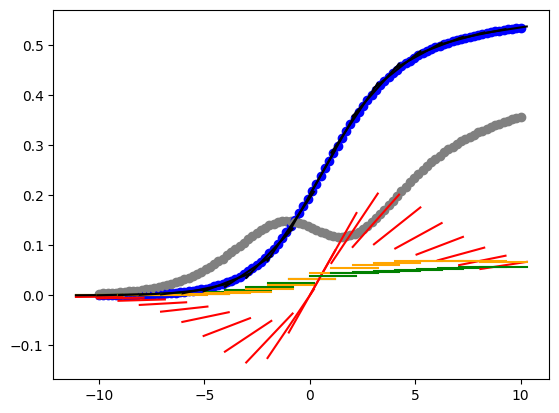

In [21]:
# Number of x input dimensions:
d = X.shape[1]
# Number of neurons:
N = 7

# Choose which feature and which neuron you are plotting:
which_feature = 0
which_neuron = 2

# Imagine some slopes and indep terms:
in_slopes_mat = np.random.random((N,d))
in_indeps_vec = np.random.random((N,1))

# Initialize the plot:
plt.figure()

# Loop:
for index, x_in_vec in enumerate(X):

  # Get the afs_in_vec:
  aux = np.sum(np.multiply(in_slopes_mat, x_in_vec), axis=1).reshape((-1, 1))
  afs_in_vec = np.add(aux, in_indeps_vec)
  
  # Use the activation function:
  afs_out_vec = np.array(tf.nn.softmax(afs_in_vec.reshape((1, -1)))).reshape(-1, 1)
  # Get the output slopes matrix and the output indep terms vec:
  out_slopes_mat, out_indeps_vec = afs_softmax(in_slopes_mat, afs_out_vec, x_in_vec)

  # Plots, for a specific feature:

  # Plot the point:
  point_x = X[index,which_feature]
  point_y = afs_out_vec[which_neuron]
  plt.scatter(point_x, point_y, color="blue")
  # The independent term in case that helps:
  plt.scatter(point_x, out_indeps_vec[which_neuron][0], color="grey")
  # Plot the tangent line:
  if np.remainder(index,5)==0:
    xx = np.linspace(point_x-1.1, point_x+1.1, num=10)
    yy1 = out_slopes_mat[which_neuron, which_feature]*xx 
    plt.plot(xx,yy1, color='red')
    xx2 = X[index,which_feature+1]*np.ones((1,10))[0]
    yy2 = out_slopes_mat[which_neuron, which_feature+1]*xx2
    plt.plot(xx,yy2, color='green')
    xx3 = X[index,which_feature+2]*np.ones((1,10))[0]
    yy3 = out_slopes_mat[which_neuron, which_feature+2]*xx3
    plt.plot(xx,yy3, color='orange')

    zz = yy1 + yy2 + yy3 + out_indeps_vec[which_neuron][0]
    plt.plot(xx,zz, color='black')


    # One of the problems is the independent term, you are not calculating it right

# Test 2 of the Softmax:

In [22]:
np.linspace(10,-10,10)

array([ 10.        ,   7.77777778,   5.55555556,   3.33333333,
         1.11111111,  -1.11111111,  -3.33333333,  -5.55555556,
        -7.77777778, -10.        ])

In [23]:
# Test 2:
num_of_instances = 100

a = np.linspace(-10.0, 10.0, num=num_of_instances).reshape((num_of_instances,1))
b = np.linspace(13.0, -13.0, num=num_of_instances).reshape((num_of_instances,1))
c = 0.5*np.ones((num_of_instances,3))

X = np.append(np.append(a, b, axis=1), c, axis=1)
#X

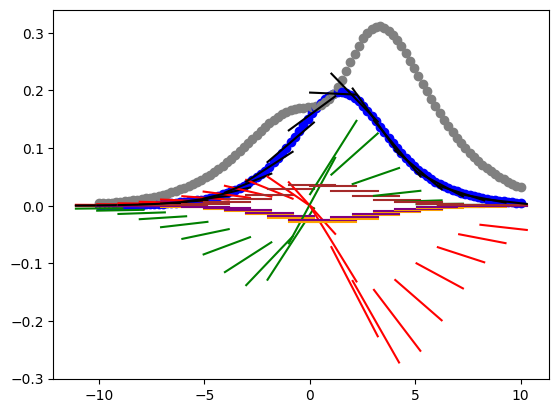

In [24]:
# Number of x input dimensions:
d = X.shape[1]
# Number of neurons:
N = 7

# Choose which feature and which neuron you are plotting:
which_feature = 0
which_neuron = 2


# Imagine some slopes and indep terms:
in_slopes_mat = np.random.random((N,d))
in_indeps_vec = np.random.random((N,1))

# Initialize the plot:
plt.figure()

# Loop:
for index, x_in_vec in enumerate(X):

  # Get the afs_in_vec:
  aux = np.sum(np.multiply(in_slopes_mat, x_in_vec), axis=1).reshape((-1, 1))
  afs_in_vec = np.add(aux, in_indeps_vec)
  
  # Use the activation function:
  afs_out_vec = np.array(tf.nn.softmax(afs_in_vec.reshape((1, -1)))).reshape(-1, 1)
  # Get the output slopes matrix and the output indep terms vec:
  out_slopes_mat, out_indeps_vec = afs_softmax(in_slopes_mat, afs_out_vec, x_in_vec)

  # Plots, for a specific feature:

  # Plot the point of one:
  point_x_a = X[index,0]
  point_x_b = X[index,1]

  point_y = afs_out_vec[which_neuron]

  plt.scatter(point_x_a, point_y, color="blue")

  # The independent term in case that helps:
  plt.scatter(point_x_a, out_indeps_vec[which_neuron][0], color="grey")

  # Plot the tangent line:
  if np.remainder(index,5)==0:
    xx_a = np.linspace(point_x_a-1.1, point_x_a+1.1, num=10)
    yy_a = out_slopes_mat[which_neuron, 0]*xx_a 
    plt.plot(xx_a,yy_a, color='red')

    xx_b = np.linspace(point_x_b+1.1, point_x_b-1.1, num=10)
    yy_b = out_slopes_mat[which_neuron, 1]*xx_b
    plt.plot(xx_a,yy_b, color='green')

    xx3 = X[index,2]*np.ones((1,10))[0]
    yy3 = out_slopes_mat[which_neuron, 2]*xx3
    plt.plot(xx_a,yy3, color='orange')

    xx4 = X[index,3]*np.ones((1,10))[0]
    yy4 = out_slopes_mat[which_neuron, 3]*xx4
    plt.plot(xx_a,yy4, color='purple')

    xx5 = X[index,3]*np.ones((1,10))[0]
    yy5 = out_slopes_mat[which_neuron, 4]*xx5
    plt.plot(xx_a,yy5, color='brown')

    zz = yy_a + yy_b + yy3 + yy4 + yy5 + out_indeps_vec[which_neuron][0]
    plt.plot(xx_a,zz, color='black')


    # One of the problems is the independent term, you are not calculating it right

In [25]:
# TO DO: In production you first need to demonstrate the t_in_j is precisely the sum of the coeffs you carry.